# **SMS Spam Classifier**

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import os
import json

# Downloading Dataset

In [ ]:
# Set Environment Variables
os.environ["KAGGLE_USERNAME"] = "roojfatima"
os.environ["KAGGLE_KEY"] = "ece0a9addf54997749529e8f399bff0f"

In [ ]:
!kaggle datasets download "uciml/sms-spam-collection-dataset"

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 121MB/s]


In [ ]:
!unzip "/content/sms-spam-collection-dataset.zip"

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


# Loading Dataset

In [ ]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropping Unnecessary Columns

In [ ]:
df = df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Handling Null Values

In [ ]:
df.isnull().sum()

,0
Target,0
Text,0


Handling Duplicates

In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["Target"] = encoder.fit_transform(df["Target"])

In [ ]:
df["Target"]

,Target
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
df.shape

(5169, 2)

In [ ]:
df.columns

Index(['Target', 'Text'], dtype='object')

In [ ]:
df.describe()

,Target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# EDA

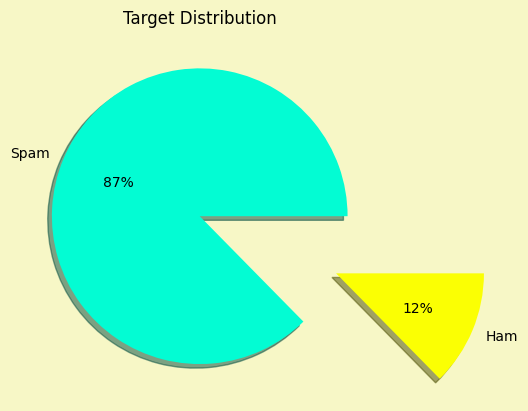

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.pie(x = df["Target"].value_counts(), labels = ["Spam", "Ham"], autopct = "%d%%", colors=["#03fcd3", "#fbff03"], explode = [0,1], shadow = True)
plt.title("Target Distribution")

plt.gcf().set_facecolor("#f7f7c6")

plt.show()
plt.tight_layout()
plt.show()

In [ ]:
!pip install nltk

In [ ]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["num_characters"] = df["Text"].apply(len)
df.sample(5)

,Target,Text,num_characters
1974,0,Thats cool. Where should i cum? On you or in y...,52
3145,0,\SHIT BABE.. THASA BIT MESSED UP.YEH,36
200,0,I sent you &lt;#&gt; bucks,28
1595,0,Pls confirm the time to collect the cheque.,43
2604,0,You call times job today ok umma and ask them ...,57


In [ ]:
df["num_words"] = df["Text"].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,Target,Text,num_characters,num_words
2631,1,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo...",154,31
318,1,December only! Had your mobile 11mths+? You ar...,157,30
1909,0,Then u going ikea str aft dat?,30,8
3208,0,Havent mus ask if u can 1st wat. Of meet 4 lun...,134,37
2203,0,soon you will have the real thing princess! Do...,65,17


In [ ]:
df["num_sentences"] = df["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,Target,Text,num_characters,num_words,num_sentences
3778,1,"Claim a 200 shopping spree, just call 08717895...",86,16,3
4943,0,Wrong phone! This phone! I answer this one but...,86,20,3
4413,0,How stupid to say that i challenge god.You don...,103,21,1
383,0,Hey i will be late ah... Meet you at 945+,41,11,1
3021,0,How dare you change my ring,27,6,1


In [ ]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["Target"] == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["Target"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

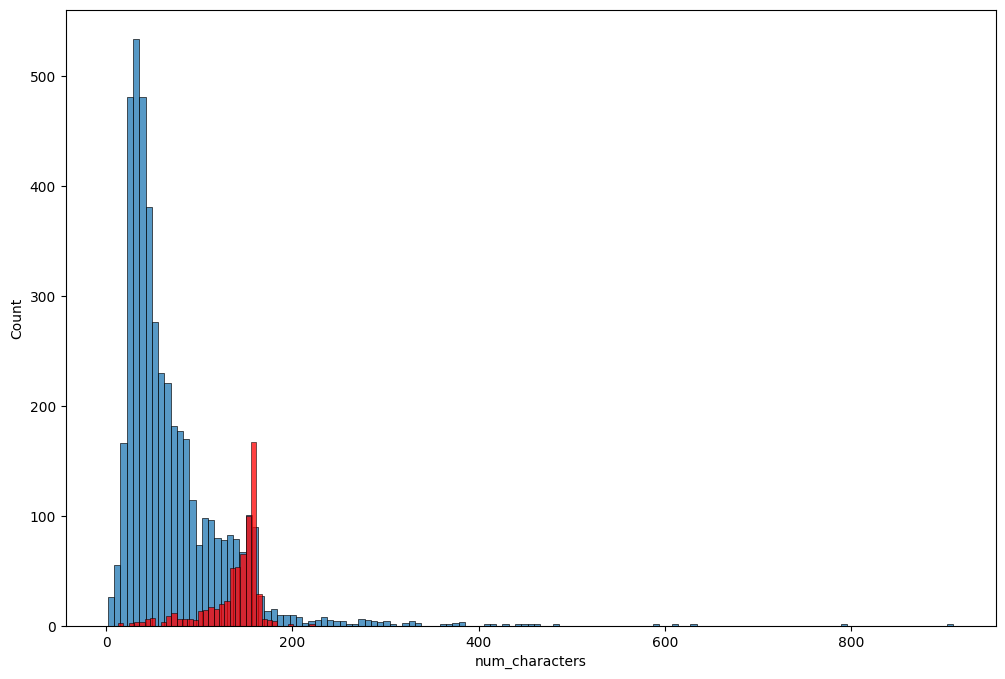

In [ ]:
plt.figure(figsize = (12,8))

sns.histplot(data = df[df["Target"]==0]["num_characters"])
sns.histplot(data = df[df["Target"]==1]["num_characters"], color = "red")

<Axes: xlabel='num_words', ylabel='Count'>

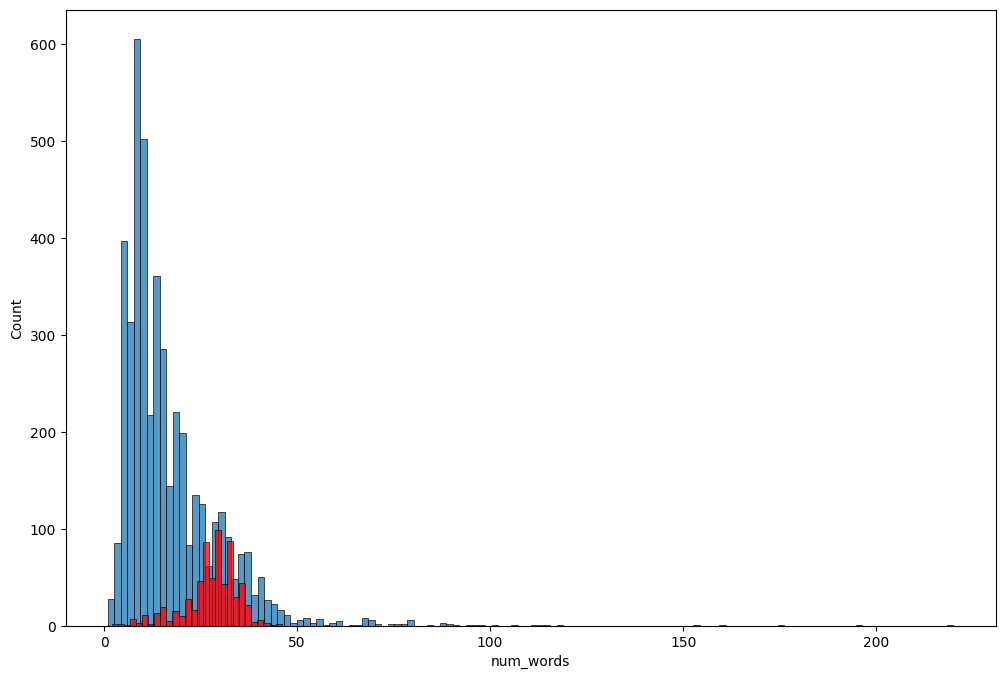

In [ ]:
plt.figure(figsize = (12,8))

sns.histplot(data = df[df["Target"]==0]["num_words"])
sns.histplot(data = df[df["Target"]==1]["num_words"],color = "red")

<Axes: xlabel='num_sentences', ylabel='Count'>

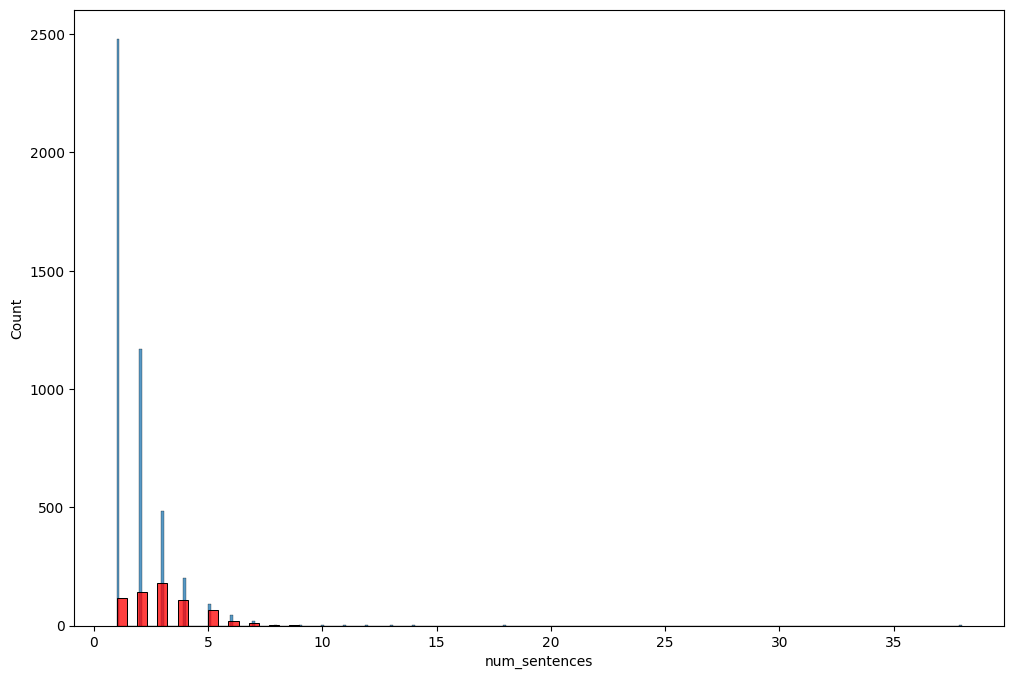

In [ ]:
plt.figure(figsize = (12,8))

sns.histplot(data = df[df["Target"]==0]["num_sentences"])
sns.histplot(data = df[df["Target"]==1]["num_sentences"], color = "red")

<Figure size 1200x800 with 0 Axes>

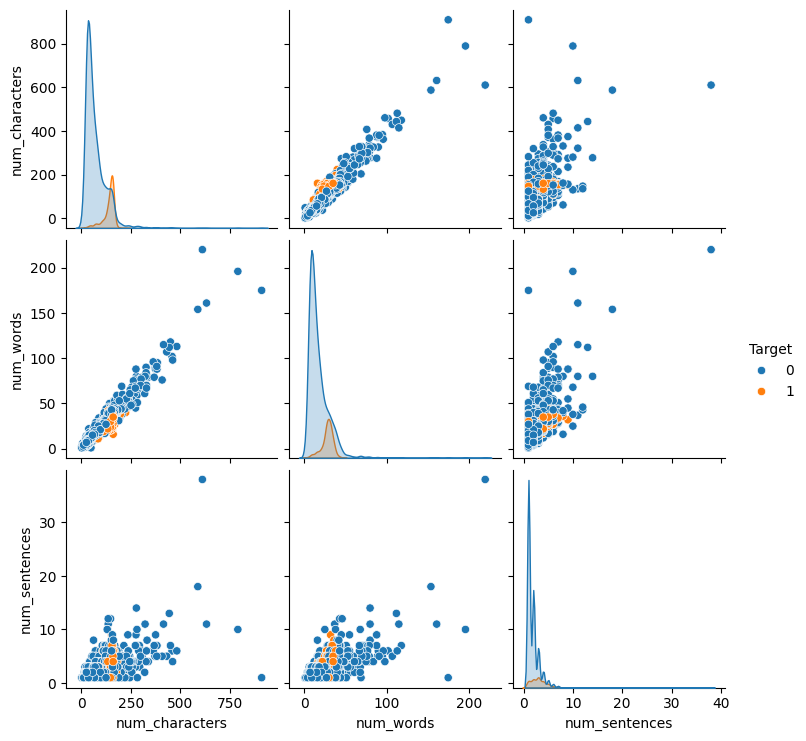

In [ ]:
plt.figure(figsize = (12,8))
sns.pairplot(df, hue = "Target")

In [ ]:
df[["num_characters", "num_words", "num_sentences", "Target"]].corr()

,num_characters,num_words,num_sentences,Target
num_characters,1.000000,0.965760,0.624139,0.384717
num_words,0.965760,1.000000,0.679971,0.262912
num_sentences,0.624139,0.679971,1.000000,0.263939
Target,0.384717,0.262912,0.263939,1.000000


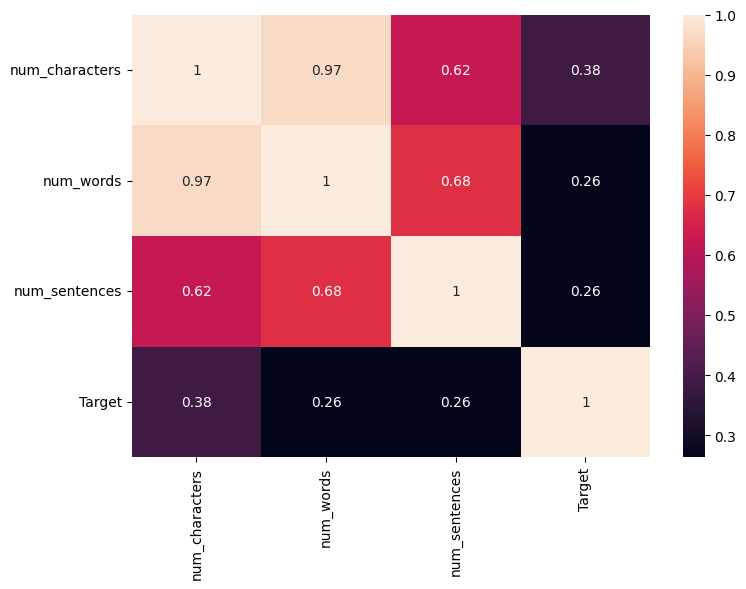

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(df[["num_characters", "num_words", "num_sentences", "Target"]].corr(), annot = True)
plt.xticks(rotation = "vertical")
plt.yticks(rotation = "horizontal")

plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  x = []
  for i in text:
    if i.isalnum():
      x.append(i)
  text = x[:]
  x.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      x.append(i)
  text = x[:]
  x.clear()

  for i in text:
    x.append(ps.stem(i))
  text = x[:]
  x.clear()

  return " ".join(text)

In [ ]:
df["Transformed_text"] = df["Text"].apply(transform_text)

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Word Cloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10,  background_color="white")

In [ ]:
ham_wc = wc.generate(df[df["Target"]==0]["Transformed_text"].str.cat(sep = " "))

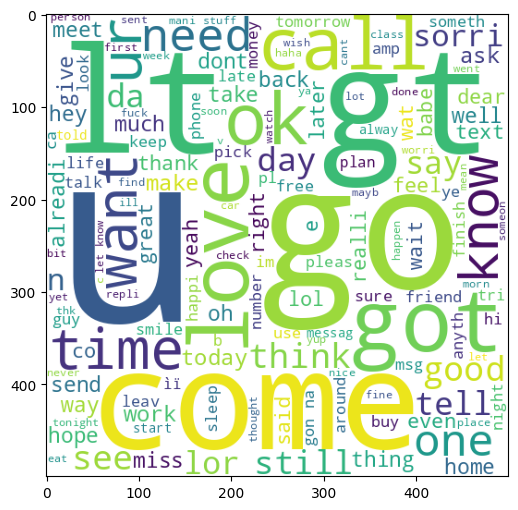

In [ ]:
plt.figure(figsize = (20,6))
plt.imshow(ham_wc)

In [ ]:
spam_wc = wc.generate(df[df["Target"]==1]["Transformed_text"].str.cat(sep = " "))

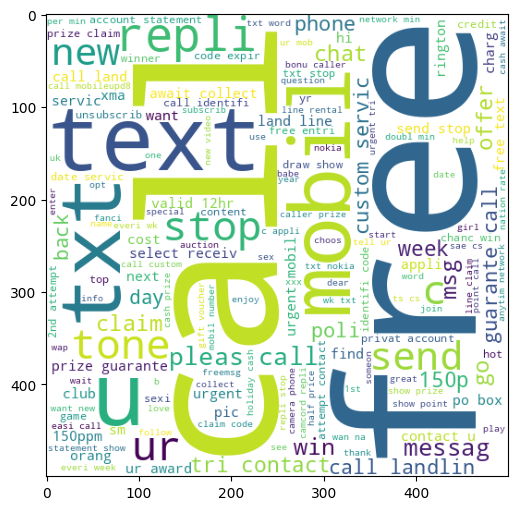

In [ ]:
plt.figure(figsize = (20,6))
plt.imshow(spam_wc)

In [ ]:
spam_words = []
for msg in df[df["Target"]==1]["Transformed_text"].tolist():
  for word in msg.split():
    spam_words.append(word)

In [ ]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
len(spam_words)

9939

In [ ]:
from collections import Counter

In [ ]:
spam_Words = pd.DataFrame(Counter(spam_words).most_common(30), columns = ["Words", "Count"])
spam_Words

,Words,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/tmp/ipython-input-3143647189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = spam_Words, x = "Words", y = "Count", palette = "viridis")


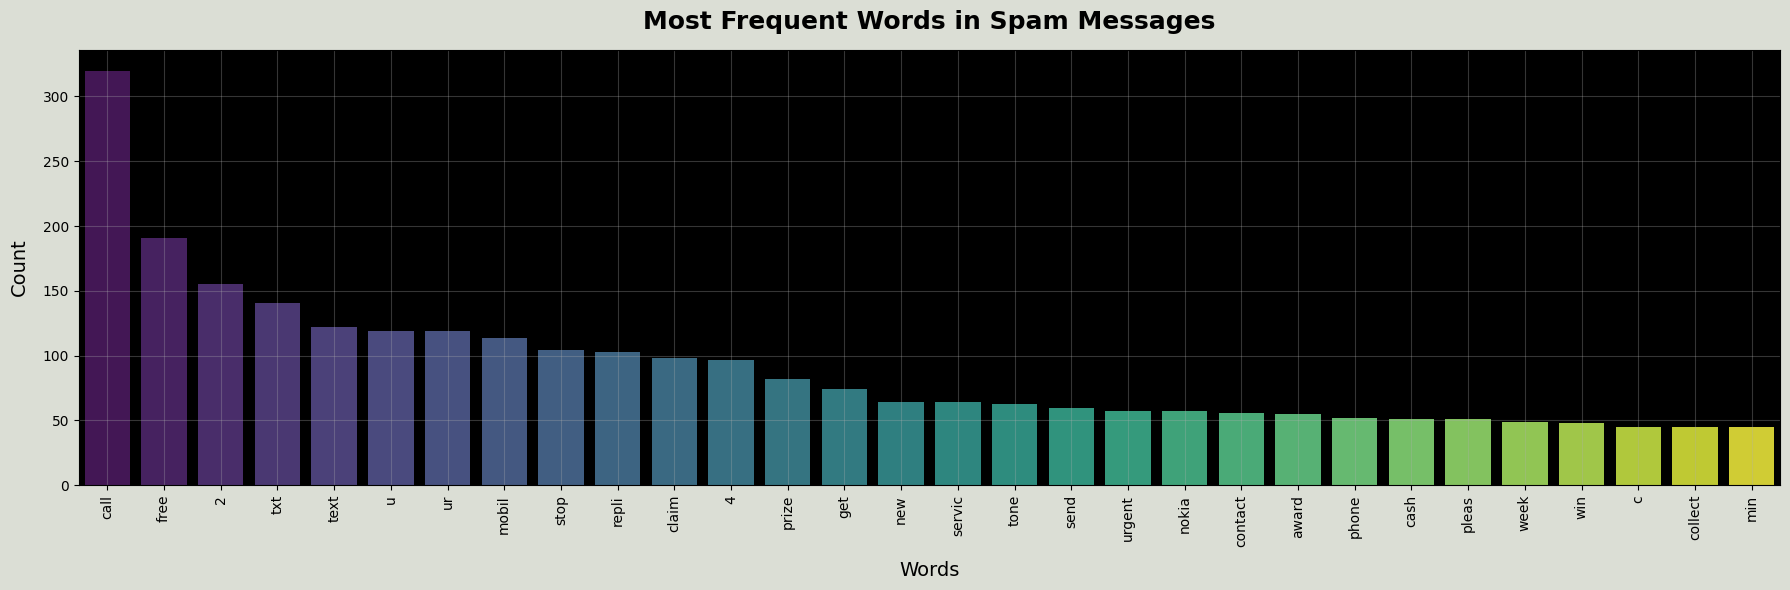

In [ ]:
plt.figure(figsize = (18,6))
sns.barplot(data = spam_Words, x = "Words", y = "Count", palette = "viridis")

plt.xticks(rotation = "vertical")

plt.xlabel("Words", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.title("Most Frequent Words in Spam Messages", fontsize=18, pad=15, weight = "bold")

plt.grid(alpha = 0.3)
plt.gcf().set_facecolor("#DBDED5")
plt.gca().set_facecolor("black")

plt.tight_layout()
plt.show()

In [ ]:
ham_words = []
for msg in df[df["Target"]==0]["Transformed_text"].tolist():
  for word in msg.split():
    ham_words.append(word)

In [ ]:
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [ ]:
len(ham_words)

35404

In [ ]:
from collections import Counter

In [ ]:
ham_Words = pd.DataFrame(Counter(ham_words).most_common(30), columns = ["Words", "Count"])
ham_Words

,Words,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


/tmp/ipython-input-80164919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = ham_Words, x = "Words", y = "Count", palette = "viridis")


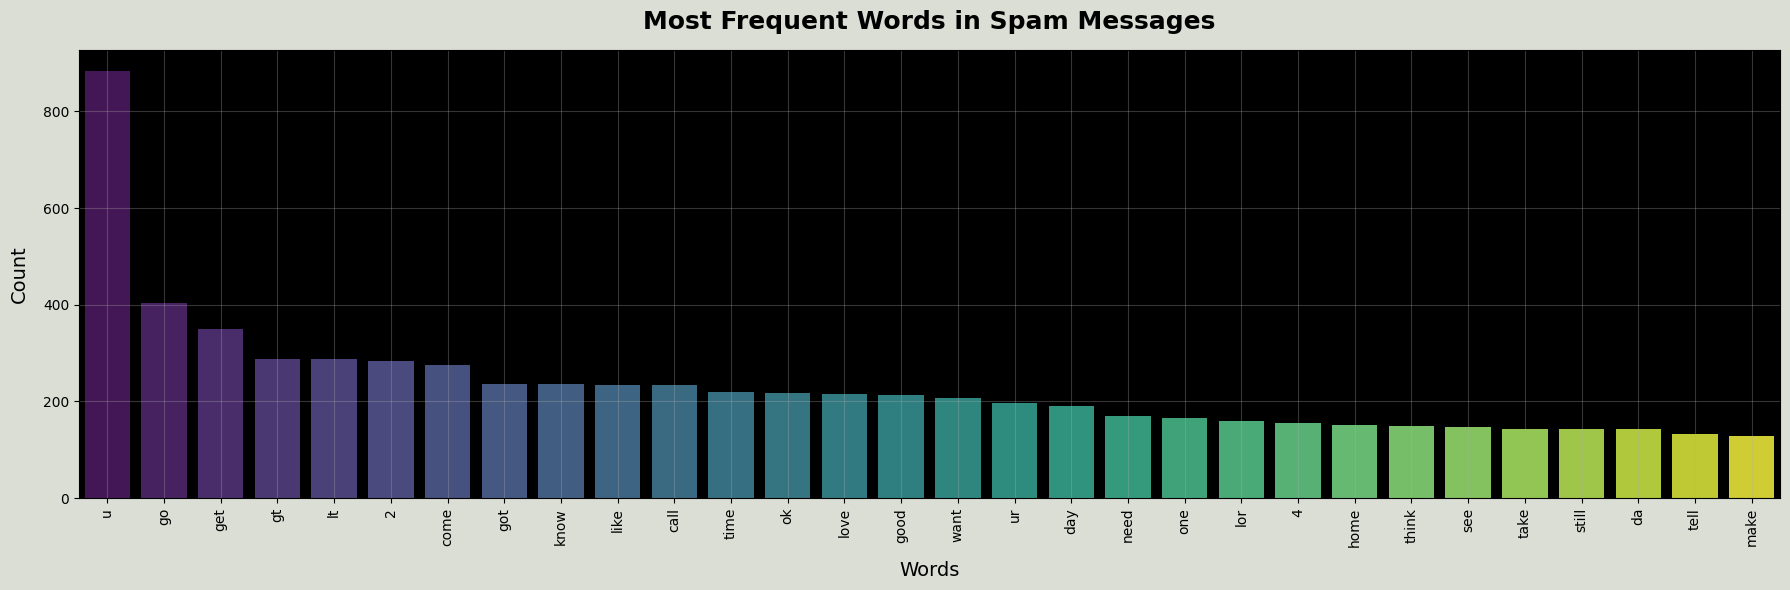

In [ ]:
plt.figure(figsize = (18,6))
sns.barplot(data = ham_Words, x = "Words", y = "Count", palette = "viridis")

plt.xticks(rotation = "vertical")

plt.xlabel("Words", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.title("Most Frequent Words in Spam Messages", fontsize=18, pad=15, weight = "bold")

plt.grid(alpha = 0.3)
plt.gcf().set_facecolor("#DBDED5")
plt.gca().set_facecolor("black")

plt.tight_layout()
plt.show()

# Model Building

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df["Transformed_text"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y = df["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=43)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = mnb.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy :", accuracy)
print("Precison :", precision)
print("Confusion Matrix :", cf)

Accuracy : 0.97678916827853
Precison : 1.0
Confusion Matrix : [[895   0]
 [ 24 115]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
lrc = LogisticRegression(solver="liblinear", penalty="l1")
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
rfc = RandomForestClassifier(n_estimators=50, random_state=43)
abc = AdaBoostClassifier(n_estimators=50, random_state=43)
bc = BaggingClassifier(n_estimators=50, random_state=43)
etc = ExtraTreesClassifier(n_estimators=50, random_state=43)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=43)
xgb = XGBClassifier(n_estimators=50, random_state=43)
svc = SVC(kernel = "sigmoid", gamma = 1.0)

In [ ]:
clfs = {
    "LRC" : lrc,
    "KNC" : knc,
    "MNB" : mnb,
    "DTC" : dtc,
    "RFC" : rfc,
    "ABC" : abc,
    "BC" : bc,
    "ETC" : etc,
    "GBDT" : gbdt
}

In [ ]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, x_test, y_train, y_test)
  print("For :", name)
  print("Accuracy :", current_accuracy)
  print("Precision :", current_precision,"\n")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For : LRC
Accuracy : 0.9439071566731141
Precision : 0.945054945054945 

For : KNC
Accuracy : 0.8984526112185687
Precision : 1.0 

For : MNB
Accuracy : 0.9622823984526112
Precision : 1.0 

For : DTC
Accuracy : 0.9197292069632496
Precision : 0.78 

For : RFC
Accuracy : 0.9613152804642167
Precision : 0.9805825242718447 

For : ABC
Accuracy : 0.9187620889748549
Precision : 0.8021978021978022 

For : BC
Accuracy : 0.9410058027079303
Precision : 0.8046875 

For : ETC
Accuracy : 0.9671179883945842
Precision : 0.972972972972973 

For : GBDT
Accuracy : 0.9361702127659575
Precision : 0.8762886597938144 



In [ ]:
pd.DataFrame({"Algorithm" : clfs.keys(), "Accuracy" : accuracy_scores, "Precision" : precision_scores}).sort_values('Precision', ascending = False)

,Algorithm,Accuracy,Precision
1,KNC,0.898453,1.000000
2,MNB,0.962282,1.000000
4,RFC,0.961315,0.980583
7,ETC,0.967118,0.972973
0,LRC,0.943907,0.945055
8,GBDT,0.936170,0.876289
6,BC,0.941006,0.804688
5,ABC,0.918762,0.802198
3,DTC,0.919729,0.780000


# Downloading Model

In [ ]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))